<a href="https://colab.research.google.com/github/jhuarancca/Coursera_Capstone/blob/master/DataAnalysis_educationVariable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
# reading csv files
df =  pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', sep=",",header=None)
df.rename(columns = {0: 'age', 1: 'workclass',2:'fnlwgt',3:'education',4:'education-num',5:'marital-status',6:'occupation',7:'relationship',8:'race',9:'sex',10:'capital-gain',11:'capital-loss',12:'hours-per-week',13:'native-country',14:'50k'}, inplace = True)



Text(0.5, 0, 'Number of candidates')

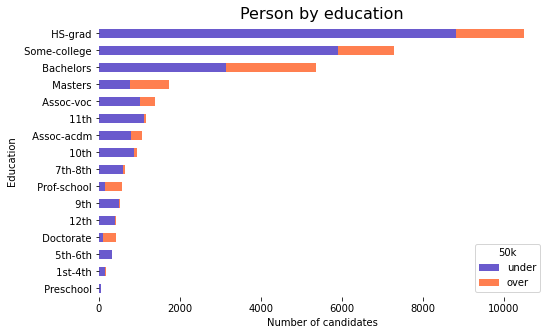

In [3]:
import matplotlib.pyplot as plt
import numpy as np

df.loc[df["50k"].str.contains("<=50K"), "50k"] = "under"
df.loc[df["50k"].str.contains(">50K"), "50k"] = "over"

test5=df.groupby(['education', '50k'])['education'].count().unstack('50k').fillna(0)
#test5 = test5.reset_index()
test5["total"]=test5["under"]+test5["over"]
test5=test5.sort_values(by=["total"],ascending=True)

my_colors = ['slateblue','coral','gray','mediumseagreen','violet','salmon','palegreen','yellowgreen','turquoise']
test5[['under','over']].plot(kind='barh', stacked=True, figsize=(8,5), color=my_colors)

plt.tick_params(bottom=True, left=True,labelbottom=True)
plt.box(False)
plt.title('Person by education', fontsize=16)
plt.ylabel("Education")
plt.xlabel("Number of candidates")

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Text(0, 0.5, '')

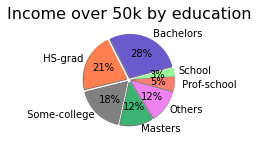

In [4]:
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

test10=df[df['50k'].str.contains("over")]
test10.loc[df["education"].str.contains("th"), "education"] = "School"
test10.loc[df["education"].str.contains("Assoc-acdm"), "education"] = "Others"
test10.loc[df["education"].str.contains("Doctorate"), "education"] = "Others"
test10.loc[df["education"].str.contains("Assoc-voc"), "education"] = "Others"

test10=test10.groupby(['education']).count()
test10=test10.sort_values(by=['age'],ascending=False)

explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05)
my_colors = ['slateblue','coral','gray','mediumseagreen','violet','salmon','palegreen','yellowgreen','turquoise']

test10.plot.pie(y='age', figsize=(5,2),autopct='%1.0f%%',legend=0,startangle=15, shadow = True, colors=my_colors,explode=explode)
plt.title('Income over 50k by education', fontsize=16)
plt.axes().set_ylabel('')

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Text(0, 0.5, '')

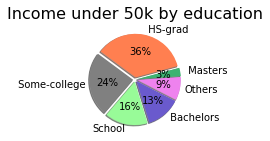

In [5]:
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

test10=df[df['50k'].str.contains("under")]
test10.loc[df["education"].str.contains("th"), "education"] = "School"
test10.loc[df["education"].str.contains("Preschool"), "education"] = "Others"
test10.loc[df["education"].str.contains("Doctorate"), "education"] = "Others"
test10.loc[df["education"].str.contains("Prof-school"), "education"] = "Others"
test10.loc[df["education"].str.contains("Assoc-voc"), "education"] = "Others"
test10.loc[df["education"].str.contains("Assoc-acdm"), "education"] = "Others"


test10=test10.groupby(['education']).count()
test10=test10.sort_values(by=['age'],ascending=False)

my_colors = ['coral','gray','palegreen','slateblue','violet','mediumseagreen','yellowgreen','turquoise','salmon']
explode = (0.05,0.05,0.05,0.05,0.05,0.05)

#my_colors = ['slateblue','coral','gray','mediumseagreen','violet','salmon','palegreen','yellowgreen','turquoise']
test10.plot.pie(y='age', figsize=(5,2),autopct='%1.0f%%',legend=0,startangle=15, shadow = True, colors=my_colors,explode=explode)
plt.title('Income under 50k by education', fontsize=16)
plt.axes().set_ylabel('')